<a href="https://colab.research.google.com/github/KithminiP/UK_accident_prediciton/blob/main/UK_road_accident_predicction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
PY = False

In [ ]:
from IPython.display import HTML
import matplotlib.pyplot as plt # visualisation library
import numpy as np # numpy is a library that allows us to work with vectors and matrices
import os
import pandas as pd # pandas is a library that allows us to work with DataFrames
from imblearn.over_sampling import RandomOverSampler, SMOTE
from scipy import stats
from scipy.stats import randint
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from time import time as tt
np.random.seed(0)

In [ ]:
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

Importing the main data set and inspecting

In [ ]:
# Load dataset from local drive (for colab notebook)
from google.colab import files
import io
uploaded = files.upload()    # Will prompt you to select file: remember to choose the right one!
main_dataset = pd.read_csv(io.BytesIO(uploaded['OPTION1_uk_road_accident_2019_coursework_final.csv']),index_col=0) # python will expect the first file to be called OPTION1_uk_road_accident_2019_coursework_final



Saving OPTION1_uk_road_accident_2019_coursework_final.csv to OPTION1_uk_road_accident_2019_coursework_final (1).csv



Dimensions of Main Dataset



In [ ]:
print(main_dataset.shape)

(31647, 13)


In [ ]:
print(main_dataset.columns)

Index(['speed_limit', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'vehicle_type', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver',
       'age_of_oldest_driver', 'accident_severity'],
      dtype='object')


In [ ]:
print(main_dataset.dtypes)

speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object


In [ ]:
main_dataset.head(10)

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
accident_index,,,,,,,,,,,,,
2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
2019400862270,60,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,male and female,NaN,serious
2019420894599,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,40.0,fatal
2019010162791,50,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,slight
2019360909153,60,daylight,fine,dry,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,fatal


In [ ]:
main_dataset.sample(10)

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
accident_index,,,,,,,,,,,,,
2019521901789,20,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,44.0,serious
2019010175344,30,daylight,fine,dry,only cars,at or within 20 metres of junction,data missing or out of range,data missing or out of range,data missing or out of range,data missing or out of range,male and female,59.0,slight
2019110845981,30,daylight,fine,dry,biped and van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,60.0,fatal
2019320190146,60,daylight,fine,dry,only cars,not at or within 20 metres of junction,at least one vehicle skidded or overturned,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all females,46.0,fatal
2019010164786,30,daylight,fine,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
2019420856288,30,daylight,fine,dry,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,44.0,slight
201t1369p0357,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,40.0,NaN
2019010201572,30,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,74.0,slight
201t950000623,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,61.0,NaN


In [ ]:
main_dataset.describe()

,speed_limit,age_of_oldest_driver
count,31647.000000,25197.000000
mean,36.572029,47.254038
std,13.837362,16.779656
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,40.000000,59.000000
max,70.000000,101.000000


Minimum speed limit shows as a minus value, therefore replacing it with NaN

In [ ]:
main_dataset.loc[main_dataset.speed_limit<0,'speed_limit'] = np.nan

Minimum value for age of the oldest driver is shown as 6 years old and has been replaced with Nan as the accepted age is equal or more than 16

In [ ]:
main_dataset.loc[main_dataset.age_of_oldest_driver<16,'age_of_oldest_driver'] = np.nan

Defining categorical features excluding accident_index column

In [ ]:
Categorical_columns= ['light_conditions', 'weather_conditions', 'road_surface_conditions','vehicle_type', 'junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact','sex_of_driver','accident_severity']

In [ ]:
for col in Categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(main_dataset[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,25152
other,5407
data missing or out of range,970
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22092
wet or damp,8761
other,374
data missing or out of range,365
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17487
at least one biped,8662
at least one van,4040
biped and van,1000
other,395
data missing or out of range,63



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,17204
not at or within 20 metres of junction,12973
data missing or out of range,1470



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,24387
at least one vehicle skidded or overturned,5226
data missing or out of range,2034



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,24019
at least one vehicle leaving carriageway,5661
data missing or out of range,1967



Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,26129
at least one vehicle hit an object,3655
data missing or out of range,1863



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,23002
other points of impact,6008
no impact,1333
data missing or out of range,1304



Categories and number of occurrences for 'sex_of_driver'


,sex_of_driver
all males,15494
male and female,7015
data missing or out of range,5122
all females,4016



Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,12672
serious,11592
fatal,6159
Serious,25
Slight,19
Fatal,8


In [ ]:
main_dataset.loc[main_dataset.accident_severity=='Fatal','accident_severity'] = 'fatal'

In [ ]:
main_dataset.loc[main_dataset.accident_severity=='Serious','accident_severity'] = 'serious'

In [ ]:
main_dataset.loc[main_dataset.accident_severity=='Slight','accident_severity'] = 'slight'

In [ ]:
main_dataset.loc[main_dataset.sex_of_driver=='data missing or out of range','sex_of_driver'] = 'all males'

In [ ]:
main_dataset.loc[main_dataset.first_point_of_impact=='data missing or out of range','first_point_of_impact'] = 'at least one vehicle with frontal impact'

In [ ]:
main_dataset.loc[main_dataset.hit_object_off_carriageway=='data missing or out of range','hit_object_off_carriageway'] = 'none hit an object'

In [ ]:
main_dataset.loc[main_dataset.vehicle_leaving_carriageway=='data missing or out of range','vehicle_leaving_carriageway'] = 'none leaving carriageway'

In [ ]:
main_dataset.loc[main_dataset.skidding_and_overturning=='data missing or out of range','skidding_and_overturning'] = 'no skidding or overturning'

In [ ]:
main_dataset.loc[main_dataset.junction_location=='data missing or out of range','junction_location'] = 'at or within 20 metres of junction'

In [ ]:
main_dataset.loc[main_dataset.vehicle_type=='data missing or out of range','vehicle_type'] = 'only cars'

In [ ]:
main_dataset.loc[main_dataset.vehicle_type=='other','vehicle_type'] = 'other vehicle type'

In [ ]:
main_dataset.loc[main_dataset.road_surface_conditions=='data missing or out of range','road_surface_conditions'] = 'dry'

In [ ]:
main_dataset.loc[main_dataset.road_surface_conditions=='wet or damp','road_surface_conditions'] = 'wet'

In [ ]:
main_dataset.loc[main_dataset.road_surface_conditions=='other','road_surface_conditions'] = 'other road surface conditions'

In [ ]:
main_dataset.loc[main_dataset.weather_conditions=='data missing or out of range','weather_conditions'] = 'fine'

In [ ]:
main_dataset.loc[main_dataset.weather_conditions=='other','weather_conditions'] = 'other weather conditions '

In [ ]:
main_dataset.loc[main_dataset.weather_conditions=='fog or mist','weather_conditions'] = 'fog'

In [ ]:
main_dataset.isna().sum()

speed_limit                      25
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6471
accident_severity              1172
dtype: int64

Handling number of missing numerical values for age_of_oldest_driver and speed limit by replacing it with mean value

In [ ]:
main_dataset_no_nans =  main_dataset.copy()

# 1. Imputer
imptr_num = SimpleImputer(missing_values = np.nan, strategy = 'mean')


# 2. Fit the imputer object to the feature matrix (only for numeric features)
numerical_columns = ['age_of_oldest_driver','speed_limit']
imptr_num = imptr_num.fit(main_dataset_no_nans[numerical_columns]) # fit the data to estimate the parameters (here, the average value)

# 3. Call Transform to replace missing data in main_dataset (on specific columns) by the mean of the column to which that missing data belongs to
main_dataset_no_nans[numerical_columns] = \
  imptr_num.transform(main_dataset_no_nans[numerical_columns]) # apply the transformation using the parameters estimated above

main_dataset_no_nans


,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
accident_index,,,,,,,,,,,,,
2019010225080,30.0,darkness,other weather conditions,wet,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.00000,serious
2019200908684,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.00000,fatal
2019040860897,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,47.28273,serious
2019460847205,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,47.28273,serious
2019051911581,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.00000,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019070317173,30.0,darkness,fine,wet,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.00000,serious
2019970892077,60.0,daylight,fine,dry,other vehicle type,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.00000,serious
20191369p0654,70.0,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.00000,slight


In [ ]:
main_dataset_no_nans.isnull().sum()

speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver              0
accident_severity              1172
dtype: int64

**Accident severity is the outcome value and it has 1172 rows with missing value out of 31647. This will be dropped.  

In [ ]:
main_dataset_no_nans.dropna(subset=["accident_severity"]).isna().sum()

speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

In [ ]:
#X = main_dataset_no_nans.drop('accident_severity', axis=1)
#y = main_dataset_no_nans['accident_severity']
#train_features, test_features, train_labels, test_labels = train_test_split(X, y, stratify=y,test_size=0.2)

Encoding catergorical data

In [ ]:
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply
            Categorical_columns, #-->columns to apply it to (we can give more than one column at once!)
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)

# the output is an NUMPY ARRAY with the encoded columns.
encoded_array= ct_cat.fit_transform(main_dataset_no_nans)

# What if we want a dataframe back? We can combine the array with the info about
# the original and transformed column names.
# This is stored in the ColumnTransformer object, which we called "ct"
# We can access it via the "get_feature_names_out()" attribute like this:
encoded_col_names= ct_cat.get_feature_names_out() #remember python's dot notation
print(encoded_col_names) #note the combined name: original column + category (e.g. Gender_Female)

main_dataset_no_nans = pd.DataFrame(encoded_array, columns=encoded_col_names)

# make sure numerical columns are of type float
main_dataset_no_nans= main_dataset_no_nans.astype(dtype={col: "float64" for col in numerical_columns})

['light_conditions_darkness' 'light_conditions_daylight'
 'weather_conditions_fine' 'weather_conditions_fog'
 'weather_conditions_other weather conditions '
 'road_surface_conditions_dry'
 'road_surface_conditions_flood over 3cm. deep'
 'road_surface_conditions_other road surface conditions'
 'road_surface_conditions_wet' 'vehicle_type_at least one biped'
 'vehicle_type_at least one van' 'vehicle_type_biped and van'
 'vehicle_type_only cars' 'vehicle_type_other vehicle type'
 'junction_location_at or within 20 metres of junction'
 'junction_location_not at or within 20 metres of junction'
 'skidding_and_overturning_at least one vehicle skidded or overturned'
 'skidding_and_overturning_no skidding or overturning'
 'vehicle_leaving_carriageway_at least one vehicle leaving carriageway'
 'vehicle_leaving_carriageway_none leaving carriageway'
 'hit_object_off_carriageway_at least one vehicle hit an object'
 'hit_object_off_carriageway_none hit an object'
 'first_point_of_impact_at least one

In [ ]:
# make sure numerical columns are of type float
main_dataset_no_nans= main_dataset_no_nans.astype(dtype={col: "float64" for col in numerical_columns})

Scaling of numerical data

In [ ]:
# create the Scaling object

my_scaler_num= StandardScaler()

# fit and transform the appropriate columns in the main dataset
main_dataset_no_nans[numerical_columns]= my_scaler_num.fit_transform(main_dataset_no_nans[numerical_columns])

# show results
print(main_dataset_no_nans[numerical_columns].head())


   age_of_oldest_driver  speed_limit
0              1.051623    -0.478499
1              2.322889    -0.478499
2              0.000000     0.246309
3              0.000000     0.246309
4             -0.554187    -0.478499


### Exploratory Data Analysis

In [ ]:
print(type(main_dataset_no_nans))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(main_dataset_no_nans.keys())

Index(['light_conditions_darkness', 'light_conditions_daylight',
       'weather_conditions_fine', 'weather_conditions_fog',
       'weather_conditions_other weather conditions ',
       'road_surface_conditions_dry',
       'road_surface_conditions_flood over 3cm. deep',
       'road_surface_conditions_other road surface conditions',
       'road_surface_conditions_wet', 'vehicle_type_at least one biped',
       'vehicle_type_at least one van', 'vehicle_type_biped and van',
       'vehicle_type_only cars', 'vehicle_type_other vehicle type',
       'junction_location_at or within 20 metres of junction',
       'junction_location_not at or within 20 metres of junction',
       'skidding_and_overturning_at least one vehicle skidded or overturned',
       'skidding_and_overturning_no skidding or overturning',
       'vehicle_leaving_carriageway_at least one vehicle leaving carriageway',
       'vehicle_leaving_carriageway_none leaving carriageway',
       'hit_object_off_carriageway_at le

In [ ]:
Categorical_features= ['light_conditions', 'weather_conditions', 'road_surface_conditions','vehicle_type', 'junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact','sex_of_driver']

In [ ]:
numerical_columns = ['age_of_oldest_driver','speed_limit']

In [ ]:
target_main=['accident_severity']

In [ ]:
# correlation map between numerical features

corr = (main_dataset_no_nans[numerical_columns].corr())

corr.style.background_gradient(cmap='viridis', axis=None).set_precision(2)

<ipython-input-147-be716e6cec5c>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='viridis', axis=None).set_precision(2)


,age_of_oldest_driver,speed_limit
age_of_oldest_driver,1.00,0.03
speed_limit,0.03,1.00


The age of oldest driver distribution

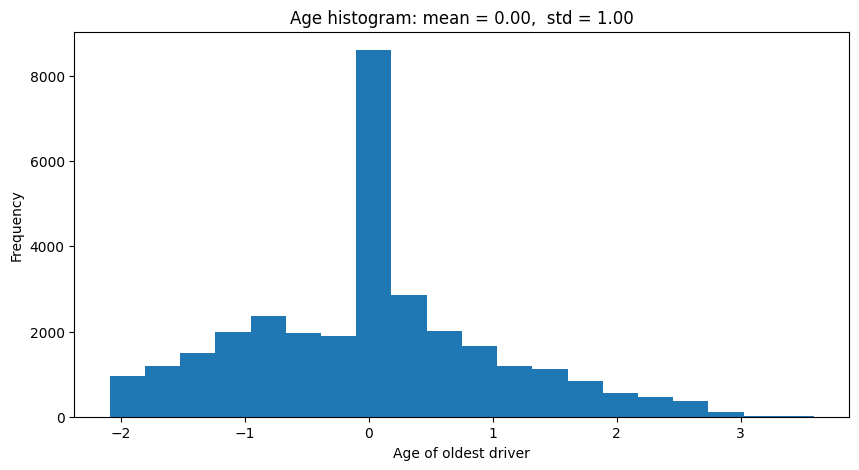

In [ ]:

_ = plt.figure(figsize=(10, 5))
_ = plt.hist(main_dataset_no_nans['age_of_oldest_driver'], bins=20)
title = "Age histogram: mean = {:0.2f},  std = {:0.2f}".format(main_dataset_no_nans['age_of_oldest_driver'].mean(),
                                                                 main_dataset_no_nans['age_of_oldest_driver'].std())
_ = plt.title(title)
_ = plt.xlabel('Age of oldest driver')
_ = plt.ylabel('Frequency')

Speed limit histogram

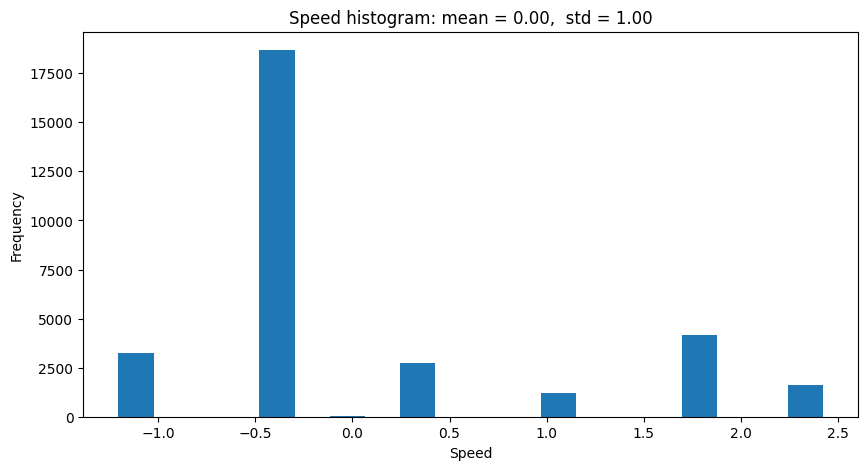

In [ ]:
_ = plt.figure(figsize=(10, 5))
_ = plt.hist(main_dataset_no_nans['speed_limit'], bins=20)
title = "Speed histogram: mean = {:0.2f},  std = {:0.2f}".format(main_dataset_no_nans['speed_limit'].mean(),
                                                                 main_dataset_no_nans['speed_limit'].std())
_ = plt.title(title)
_ = plt.xlabel('Speed')
_ = plt.ylabel('Frequency')

Principal component analysis

In [ ]:
scaler = StandardScaler().set_output(transform="pandas")

scaled_data_main = scaler.fit_transform(main_dataset_no_nans)


In [ ]:
from sklearn.decomposition import PCA

# checking with various n_components of PCA
# and storing the result -- cumulative variance explained by the transformed features
comp_num_lst = range(2,14)
# we start from at least 2 principal components and we can not have more principal components than features
# (remember that the range(A,B) creates a list of numbers from A to B-1, that is with B *excluded*)
# let's store how much explained variance we have with each extra component
var_exp_lst = []

# we build multiple PCA models, each with a different number of principal components we choose to retain
for comp_num in comp_num_lst:
    # initialize PCA object and specify the number of PCA feature to get
    pca = PCA(n_components=comp_num)
    pca = pca.fit(scaled_data_main)
    var_exp_lst.append(np.sum(pca.explained_variance_ratio_))

Explained Variances: {2: 0.242, 3: 0.317, 4: 0.384, 5: 0.447, 6: 0.5, 7: 0.548, 8: 0.592, 9: 0.635, 10: 0.671, 11: 0.703, 12: 0.734, 13: 0.765}



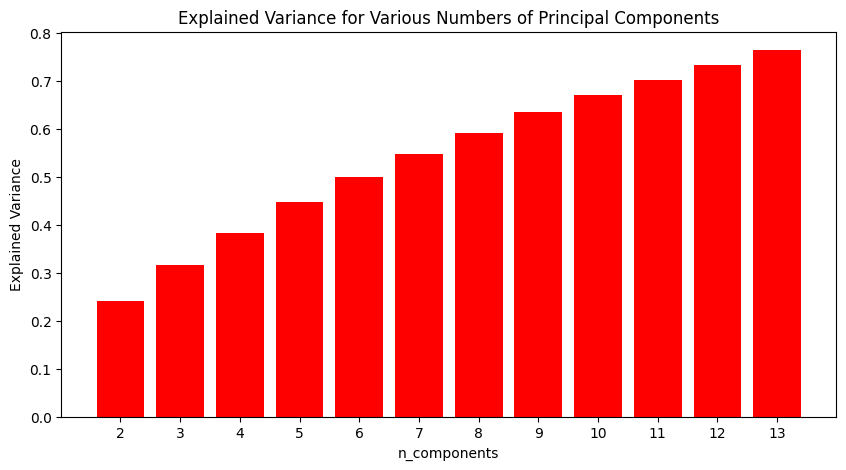

In [ ]:
# let's plot the explained variance as a function of the number of components
# this is an auxiliary variable to build a proper horizontal axis
ind = [i for i in range(len(comp_num_lst))]

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)
# we want as many bars as there are PCA models we tried
_ = ax1.set_xticks(ind)
_ = ax1.set_xticklabels(comp_num_lst)
_ = ax1.bar(ind, var_exp_lst, width=0.8, color='red')
_ = ax1.set_title('Explained Variance for Various Numbers of Principal Components')
_ = ax1.set_xlabel('n_components')
_ = ax1.set_ylabel('Explained Variance')

print('Explained Variances: {}'.format(dict(zip(comp_num_lst, [np.around(t,3) for t in var_exp_lst]))))
print()
#plt.show()

In [ ]:
pca = PCA(n_components=.80)
pca_transform = pca.fit_transform(scaled_data_main)
print(f'We need {len(pca.explained_variance_ratio_)} components to explain at least 80% of the variance')

We need 15 components to explain at least 80% of the variance


## **Splitting the main data set in to Training and Test Datasets **

Training, test dataset needs to be divided as 80:20

In [ ]:
X = main_dataset_no_nans.drop(['accident_severity_fatal', 'accident_severity_serious', 'accident_severity_slight', 'accident_severity_nan'], axis=1)
y = main_dataset_no_nans[['accident_severity_fatal', 'accident_severity_serious', 'accident_severity_slight', 'accident_severity_nan']]
train_features, test_features, train_labels, test_labels = train_test_split(X, y, stratify=y,test_size=0.2)

In [ ]:
print(train_features.shape)

(25317, 30)


In [ ]:
print(train_labels.shape)

(25317, 4)


In [ ]:
print(test_features.shape)

(6330, 30)


In [ ]:
print(test_labels.shape)

(6330, 4)


## Classification using traditional machine learning

**Modeling using Random forest **

In [ ]:
rf = RandomForestClassifier()
rf.fit(train_features, train_labels)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(test_features)

In [ ]:
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6589257503949447


In [ ]:
precision = precision_score(test_labels, y_pred,average='micro')
print("Precision:", precision)

Precision: 0.7049180327868853


In [ ]:
recall = recall_score(test_labels, y_pred,average='micro')
print("Recall:", recall)

Recall: 0.6589257503949447


Hyperparameter Tuning

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(train_features, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa2b7e9c8e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa2b7ea0f70>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 157}


***Modeling using Confusion Matrix***

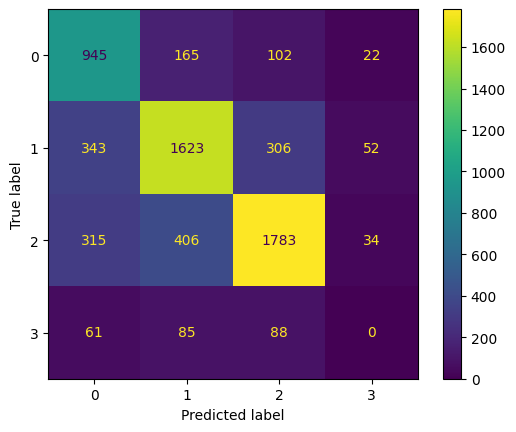

In [ ]:
# Generate predictions with the best model
import tensorflow as tf
label = tf.argmax(test_labels, axis = 1)
pred =  tf.argmax(y_pred, axis = 1)
y_pred = best_rf.predict(test_features)

# Create the confusion matrix
cm = confusion_matrix(label, pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy = accuracy_score(label, pred)
precision = precision_score(label,pred,average='micro')
recall = recall_score(label, pred,average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6873617693522907
Precision: 0.6873617693522907
Recall: 0.6873617693522907


Evaluating ML model on test data

In [ ]:
#classification report on test dataset
classif_re = classification_report(test_labels,y_pred)
print(classif_re)

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      1234
           1       0.79      0.73      0.76      2324
           2       0.85      0.74      0.79      2538
           3       0.00      0.00      0.00       234

   micro avg       0.78      0.70      0.74      6330
   macro avg       0.57      0.54      0.55      6330
weighted avg       0.76      0.70      0.73      6330
 samples avg       0.70      0.70      0.70      6330



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# f1_score of the model
f1score = f1_score(test_labels,y_pred, average='weighted')
print(f1score)

0.7261352770957554


***Modeling using Decision Tree***

# Classification using neural networks

In [ ]:
print(train_features.shape)

(25317, 30)


In [ ]:
print(train_labels.shape)

(25317, 4)


In [ ]:
print(test_features.shape)

(6330, 30)


In [ ]:
print(test_labels.shape)

(6330, 4)


In [ ]:
# Let's print the percentage or target categories in both the training and test dataset
# printing the percentage means we can compare whether the two label distributions are similar
print('Label distribution in training dataset')
print(train_labels.value_counts(normalize=True))

print('Label distribution in test dataset')
print(test_labels.value_counts(normalize=True))

Label distribution in training dataset
accident_severity_fatal  accident_severity_serious  accident_severity_slight  accident_severity_nan
0.0                      0.0                        1.0                       0.0                      0.401035
                         1.0                        0.0                       0.0                      0.367066
1.0                      0.0                        0.0                       0.0                      0.194849
0.0                      0.0                        0.0                       1.0                      0.037050
dtype: float64
Label distribution in test dataset
accident_severity_fatal  accident_severity_serious  accident_severity_slight  accident_severity_nan
0.0                      0.0                        1.0                       0.0                      0.400948
                         1.0                        0.0                       0.0                      0.367141
1.0                      0.0           

Modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# create a simple model with ONE hidden layer only
model = models.Sequential()
# we will create a hidden layer with 20 nodes.
hidden_layer_nodes = 20
num_of_input_features = train_features.shape[1] #number of features = number of columns in the input matrix

# We can specify an input layer to tell Keras what input to expect.
# we tell Keras how many features to expect for each datapoint. This way Keras
# knows how many weights are needed between the input and the first hidden layer
model.add(layers.Input(shape=(num_of_input_features,)))
model.add(layers.Dense(hidden_layer_nodes, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?

# as metric we choose the accuracy: the total number of correct predictions made
# Adam is a typical choice for an optimizer and tends to perform well in practice
# the most typical choice for the loss function is the binary cross entropy since
# we are solving a binary classification task. If we were solving a multi-class classification
# task, we'd choose the categorical cross entropy (that is, the more general version)
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(), #we use this function for BINARY CLASSIFICATION
              metrics=['accuracy'])

# let's print a summary of the model to see what it's like
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None


Data imbalance

In [ ]:
# compute class weights to counteract lable data imbalance
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight= "balanced",
    classes = np.unique(train_labels),
    y = train_labels.values.reshape(-1))

# we turn the weights into a dictionary
class_weights = dict(zip(np.unique(train_labels), class_weights))

# Let's print the results
# note that encoded label 0 corresponds to the original label 'N': there are fewer instances of 'N' so this class is given a higher weight in the loss function
print(class_weights)

{0.0: 0.6666666666666666, 1.0: 2.0}


In [ ]:
print(train_features.shape)

(25317, 30)


In [ ]:
print(train_labels.shape)

(25317, 4)


Model training

In [ ]:
# Training
# let's define some relevant hyper-parameters:
batch_size = 100   # The batch size indicates how many data points we use to compute each update to the parameters of the models (based on the gradient of the loss)
epochs = 25       #how long we train the model for
validation_split = 0.2     #Fraction of the training data to be used as validation data.
#tf.expand_dims(train_features,axis=-1)
#train_features = train_features.batch(batch_size)
#train_features = train_features.values.reshape(-1)
#history = model.fit(tf.expand_dims(train_features,1),
data_list = tf.stack(train_features)
y = tf.stack(y)
history = model.fit(train_features,
                    train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split= validation_split,
                    class_weight= class_weights,
                    )

# note that the output variable "history" keeps track of the model performance at each epoch


Epoch 1/25


ValueError: ignored

Evaluation

In [ ]:
# let's see what's within the 'history' variable
history.history.keys()

In [ ]:
# Plot training curves for both training and validation data
# loss per epoch
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (binary cross-entropy)')
plt.legend(loc='lower right')

#accuracy per epoch
plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import balanced_accuracy_score

# Check performance on test data
test_probabilities = model.predict(X_test_preprocessed)
# There is a small difference from scikit-learn when we call .predict()
# Keras returns the *class probabilities* rather than the predictions
# For a binary classification problem, this is the probability that a data point
# belongs to class 1.
# So, to get the class we apply a threshold of 0.5: if the probability of being in
# class 1 is higher than 0.5 we assign that data point to class 1, otherwise to
# class 0. This is done by the following line:
test_predictions = test_probabilities > .5

# let's show the classification report with all the metrics
# think about which metrics you think are the most important ones for this problem!
print(classification_report(test_encoded_labels,test_predictions,
                            target_names= lblEncoder_Y.classes_)) # this is to give the real categories, not their encoded numbers

# let's also print the balanced accuracy score, since we know the dataset is not balanced
print(f'The balanced accuracy score is {balanced_accuracy_score(test_encoded_labels,test_predictions):.3f}\n')

# let's get all the numbers for the confusion matrix
cm = confusion_matrix(test_encoded_labels,test_predictions)#,
#                      labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers

# let's show the confusion matrix in a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers
disp.plot()
plt.show()

Scikeras

In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV


def one_layer_model(num_of_input_features, hidden_layer_nodes=20):
    """
    We wrap the model into a function for better usability.
    We make some of the important hyper-parameters, like the learning rate,
    as arguments to the function. This way we can test different values for these
    hyperparameters without having to change the hard-coded model itself.
    """
    # create a simple model with ONE hidden layer only
    model = models.Sequential()
    # we create a hidden layer with 20 nodes.
    # Here we can directly give it the input shape. Otherwise we can also create a separate input layer
    model.add(layers.Dense(hidden_layer_nodes, input_dim=num_of_input_features, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?
    return model

In [ ]:
clf = KerasClassifier(
    model=one_layer_model,
    loss="binary_crossentropy",
    model__hidden_layer_nodes=20,
    num_of_input_features= X_train_preprocessed.shape[1],
    epochs= 50,
    batch_size= 64,
    verbose= 0,
    validation_split= 0.2,
    optimizer = "adam",
    optimizer__learning_rate = 0.001,
)


In [ ]:
params = {
    'optimizer__learning_rate': [0.01, 0.001],
    'model__hidden_layer_nodes': [20,30,40],
}

gs = GridSearchCV(clf, params, scoring='balanced_accuracy', verbose=True)

gs.fit(X_train_preprocessed, train_encoded_labels)

print(gs.best_score_, gs.best_params_)